In [1]:
import json
import pandas as pd


In [2]:
#reading the json file 
with open('insurance-policies.json') as json_file:
    data = json.load(json_file)
#making the json file to df 
df = pd.DataFrame(data)

In [3]:
df.head()

,sum_insured,policy_number,first_name,last_name,excess,premium,ipt_percent,commission_broker_percent,commission_SERL_percent,product_name,start_date,sale_date,term_length_months,end_date,cancel_date,state,sum_insureed,first name,sale_dates
0,60163.0,D8MNRRU0,Sarah,Brown,590,967,0.0,7,2,Life Insurance,2020-04-13,2018-01-01,13,None,None,Bound,NaN,NaN,NaN
1,93548.0,0XPGXTFD,Sarah,Davis,260,386,0.0,10,5,Life Insurance,2025-05-04,2018-02-01,21,None,2024-03-22,Expired,NaN,NaN,NaN
2,11199.0,923I4RKK,David,Garcia,1004,636,12.0,13,2,Motor Insurance,2021-09-05,2018-02-01,40,None,2024-10-17,Bound,NaN,NaN,NaN
3,70394.0,4QUKUEE1,David,Brown,599,905,12.0,5,6,Motor Insurance,2020-07-04,2018-02-01,40,None,2024-01-11,Bound,NaN,NaN,NaN
4,102667.0,GOHS0F37,John,Miller,916,934,12.0,9,3,Home Insurance,2022-02-20,2018-02-01,20,None,None,Expired,NaN,NaN,NaN


In [4]:
df.columns

Index(['sum_insured', 'policy_number', 'first_name', 'last_name', 'excess',
       'premium', 'ipt_percent', 'commission_broker_percent',
       'commission_SERL_percent', 'product_name', 'start_date', 'sale_date',
       'term_length_months', 'end_date', 'cancel_date', 'state',
       'sum_insureed', 'first name', 'sale_dates'],
      dtype='object')

There are few columns that seems to be duplicates . I want to make sure that there3 is nothing missing 

In [5]:
df.isnull().sum()

sum_insured                  138
policy_number                  0
first_name                   138
last_name                      0
excess                         0
premium                        0
ipt_percent                  138
commission_broker_percent      0
commission_SERL_percent        0
product_name                   0
start_date                     0
sale_date                    138
term_length_months             0
end_date                     650
cancel_date                  580
state                          0
sum_insureed                 512
first name                   512
sale_dates                   512
dtype: int64

In [6]:
((df['first_name'].isna()) & (df['first name'].isna())).sum()

0

In [7]:
((df['first_name'].isna()) ^ (df['first name'].isna())).sum()

650

In [8]:
((df['sale_dates'].isna()) & (df['sale_date'].isna())).sum()

0

In [9]:
((df['sum_insured'].isna()) & (df['sum_insureed'].isna())).sum()

0

So this is a typo and this is leeding it to make a new column because of different keys  . i will combine the both and make it one column

In [10]:
df['first_name'] = df['first_name'].fillna(df['first name'])

In [11]:
df['sale_date'] = df['sale_date'].fillna(df['sale_dates'])

In [12]:
df['sum_insured'] = df['sum_insured'].fillna(df['sum_insureed'])

In [13]:
df.drop(columns=['first name','sale_dates','sum_insureed'], inplace=True)

In [14]:
df.isnull().sum()

sum_insured                    0
policy_number                  0
first_name                     0
last_name                      0
excess                         0
premium                        0
ipt_percent                  138
commission_broker_percent      0
commission_SERL_percent        0
product_name                   0
start_date                     0
sale_date                      0
term_length_months             0
end_date                     650
cancel_date                  580
state                          0
dtype: int64

In [15]:
df.to_csv('data.csv')

no we have few places ipt percentage is missing . i am assuming it to be 0 . and end date can be technically calcluated by adding the term length and start data . but for this metrics we dont need it.

In [16]:
df.dtypes

sum_insured                  float64
policy_number                 object
first_name                    object
last_name                     object
excess                         int64
premium                        int64
ipt_percent                  float64
commission_broker_percent      int64
commission_SERL_percent        int64
product_name                  object
start_date                    object
sale_date                     object
term_length_months             int64
end_date                      object
cancel_date                   object
state                         object
dtype: object

In [17]:
#converting sale_date , start_date and end_date to date time

In [18]:
df['sale_date'] = pd.to_datetime(df['sale_date'])

In [19]:
df['start_date'] = pd.to_datetime(df['start_date'])

In [20]:
df['end_date'] = pd.to_datetime(df['end_date'])

In [21]:
df.dtypes

sum_insured                         float64
policy_number                        object
first_name                           object
last_name                            object
excess                                int64
premium                               int64
ipt_percent                         float64
commission_broker_percent             int64
commission_SERL_percent               int64
product_name                         object
start_date                   datetime64[ns]
sale_date                    datetime64[ns]
term_length_months                    int64
end_date                     datetime64[ns]
cancel_date                          object
state                                object
dtype: object

In [22]:
# 1. Monthly policy sales figures
policy_sales_figures = df.groupby(df['sale_date'].dt.to_period('M')).size().rename('Policy Sales')

In [23]:
policy_sales_figures

sale_date
2018-01      1
2018-02      4
2018-03     25
2018-04     25
2018-05     36
2018-06     49
2018-07     64
2018-08     81
2018-09    100
2018-11    121
2018-12    144
Freq: M, Name: Policy Sales, dtype: int64

In [24]:
# 2. Cancellation counts per month
cancellation_counts = df.dropna(subset=['cancel_date']).groupby(pd.to_datetime(df['cancel_date']).dt.to_period('M')).size().rename('Cancellations')

In [25]:
cancellation_counts

cancel_date
2024-01     8
2024-02     4
2024-03    10
2024-04     7
2024-05     7
2024-06     5
2024-07     4
2024-08     5
2024-09     4
2024-10     6
2024-11     4
2024-12     6
Freq: M, Name: Cancellations, dtype: int64

In [26]:

# 3. Month-over-month sales growth rates
monthly_sales_growth = policy_sales_figures.pct_change().rename('Sales Growth Rate')
#converting it into percentage 
monthly_sales_growth= monthly_sales_growth*100

In [27]:
monthly_sales_growth

sale_date
2018-01           NaN
2018-02    300.000000
2018-03    525.000000
2018-04      0.000000
2018-05     44.000000
2018-06     36.111111
2018-07     30.612245
2018-08     26.562500
2018-09     23.456790
2018-11     21.000000
2018-12     19.008264
Freq: M, Name: Sales Growth Rate, dtype: float64

In [28]:
# 4. Total monthly premium collections
total_premium_collections = df.groupby(df['sale_date'].dt.to_period('M'))['premium'].sum().rename('Total Premium Collections')



In [29]:
total_premium_collections

sale_date
2018-01      967
2018-02     2861
2018-03    13418
2018-04    16431
2018-05    21450
2018-06    29605
2018-07    36996
2018-08    51051
2018-09    62752
2018-11    73851
2018-12    86533
Freq: M, Name: Total Premium Collections, dtype: int64

In [30]:
# 5. Monthly Insurance Premium Tax (IPT) contributions
monthly_ipt_contributions = (df['premium'] * df['ipt_percent'] / 100).groupby(df['sale_date'].dt.to_period('M')).sum().rename('IPT Contributions')



In [31]:
monthly_ipt_contributions

sale_date
2018-01       0.00
2018-02     297.00
2018-03    1001.76
2018-04     991.56
2018-05    1617.12
2018-06    2701.32
2018-07    2959.92
2018-08    3805.20
2018-09    4700.64
2018-11    5504.88
2018-12    6283.44
Freq: M, Name: IPT Contributions, dtype: float64

In [32]:
# 6. SERL's monthly commission earnings
serl_commission_earnings = (df['premium'] * df['commission_SERL_percent'] / 100).groupby(df['sale_date'].dt.to_period('M')).sum().rename('SERL Commission Earnings')



In [33]:
serl_commission_earnings

sale_date
2018-01      19.34
2018-02     114.34
2018-03     582.84
2018-04     653.08
2018-05     854.57
2018-06    1225.71
2018-07    1506.26
2018-08    2069.44
2018-09    2482.69
2018-11    2741.30
2018-12    3371.94
Freq: M, Name: SERL Commission Earnings, dtype: float64

In [34]:
# 7. The top-performing product for SERL in terms of revenue, identified monthly
top_performing_product = df[df['commission_SERL_percent'] != 0].groupby([df['sale_date'].dt.to_period('M'), 'product_name'])['premium'].sum().reset_index()
top_performing_product = top_performing_product.loc[top_performing_product.groupby('sale_date')['premium'].idxmax()]


In [35]:
top_performing_product

,sale_date,product_name,premium
0,2018-01,Life Insurance,967
3,2018-02,Motor Insurance,1541
6,2018-03,Motor Insurance,4854
8,2018-04,Home Insurance,5187
15,2018-05,Pet Insurance,7267
18,2018-06,Motor Insurance,8612
23,2018-07,Pet Insurance,11927
24,2018-08,Home Insurance,17184
31,2018-09,Pet Insurance,18019
34,2018-11,Motor Insurance,20841


In [36]:

# Combine all metrics into a single DataFrame
monthly_metrics = pd.concat([policy_sales_figures, cancellation_counts, monthly_sales_growth, total_premium_collections, monthly_ipt_contributions, serl_commission_earnings], axis=1)


In [37]:
monthly_metrics.reset_index(inplace=True)
monthly_metrics.rename(columns={'index': 'sale_date'}, inplace=True)

In [38]:
monthly_metrics.fillna(0)

,sale_date,Policy Sales,Cancellations,Sales Growth Rate,Total Premium Collections,IPT Contributions,SERL Commission Earnings
0,2018-01,1.0,0.0,0.000000,967.0,0.00,19.34
1,2018-02,4.0,0.0,300.000000,2861.0,297.00,114.34
2,2018-03,25.0,0.0,525.000000,13418.0,1001.76,582.84
3,2018-04,25.0,0.0,0.000000,16431.0,991.56,653.08
4,2018-05,36.0,0.0,44.000000,21450.0,1617.12,854.57
5,2018-06,49.0,0.0,36.111111,29605.0,2701.32,1225.71
6,2018-07,64.0,0.0,30.612245,36996.0,2959.92,1506.26
7,2018-08,81.0,0.0,26.562500,51051.0,3805.20,2069.44
8,2018-09,100.0,0.0,23.456790,62752.0,4700.64,2482.69
9,2018-11,121.0,0.0,21.000000,73851.0,5504.88,2741.30


In [39]:
top_performing_product

,sale_date,product_name,premium
0,2018-01,Life Insurance,967
3,2018-02,Motor Insurance,1541
6,2018-03,Motor Insurance,4854
8,2018-04,Home Insurance,5187
15,2018-05,Pet Insurance,7267
18,2018-06,Motor Insurance,8612
23,2018-07,Pet Insurance,11927
24,2018-08,Home Insurance,17184
31,2018-09,Pet Insurance,18019
34,2018-11,Motor Insurance,20841


In [40]:
Final_df = pd.merge(monthly_metrics, top_performing_product[['sale_date', 'product_name','premium']], on='sale_date', how='left')

In [41]:
Final_df.fillna(0)

,sale_date,Policy Sales,Cancellations,Sales Growth Rate,Total Premium Collections,IPT Contributions,SERL Commission Earnings,product_name,premium
0,2018-01,1.0,0.0,0.000000,967.0,0.00,19.34,Life Insurance,967.0
1,2018-02,4.0,0.0,300.000000,2861.0,297.00,114.34,Motor Insurance,1541.0
2,2018-03,25.0,0.0,525.000000,13418.0,1001.76,582.84,Motor Insurance,4854.0
3,2018-04,25.0,0.0,0.000000,16431.0,991.56,653.08,Home Insurance,5187.0
4,2018-05,36.0,0.0,44.000000,21450.0,1617.12,854.57,Pet Insurance,7267.0
5,2018-06,49.0,0.0,36.111111,29605.0,2701.32,1225.71,Motor Insurance,8612.0
6,2018-07,64.0,0.0,30.612245,36996.0,2959.92,1506.26,Pet Insurance,11927.0
7,2018-08,81.0,0.0,26.562500,51051.0,3805.20,2069.44,Home Insurance,17184.0
8,2018-09,100.0,0.0,23.456790,62752.0,4700.64,2482.69,Pet Insurance,18019.0
9,2018-11,121.0,0.0,21.000000,73851.0,5504.88,2741.30,Motor Insurance,20841.0


In [42]:
new_column_names = {
    'product_name': 'Best_product',
    'premium': 'best_product_total_premium',
}

In [44]:
Final_df.rename(columns=new_column_names, inplace=True)

In [45]:
Final_df

,sale_date,Policy Sales,Cancellations,Sales Growth Rate,Total Premium Collections,IPT Contributions,SERL Commission Earnings,Best_product,best_product_total_premium
0,2018-01,1.0,NaN,NaN,967.0,0.00,19.34,Life Insurance,967.0
1,2018-02,4.0,NaN,300.000000,2861.0,297.00,114.34,Motor Insurance,1541.0
2,2018-03,25.0,NaN,525.000000,13418.0,1001.76,582.84,Motor Insurance,4854.0
3,2018-04,25.0,NaN,0.000000,16431.0,991.56,653.08,Home Insurance,5187.0
4,2018-05,36.0,NaN,44.000000,21450.0,1617.12,854.57,Pet Insurance,7267.0
5,2018-06,49.0,NaN,36.111111,29605.0,2701.32,1225.71,Motor Insurance,8612.0
6,2018-07,64.0,NaN,30.612245,36996.0,2959.92,1506.26,Pet Insurance,11927.0
7,2018-08,81.0,NaN,26.562500,51051.0,3805.20,2069.44,Home Insurance,17184.0
8,2018-09,100.0,NaN,23.456790,62752.0,4700.64,2482.69,Pet Insurance,18019.0
9,2018-11,121.0,NaN,21.000000,73851.0,5504.88,2741.30,Motor Insurance,20841.0


In [47]:
Final_df.to_csv('monthly_metrics.csv')

<Axes: xlabel='sale_date'>

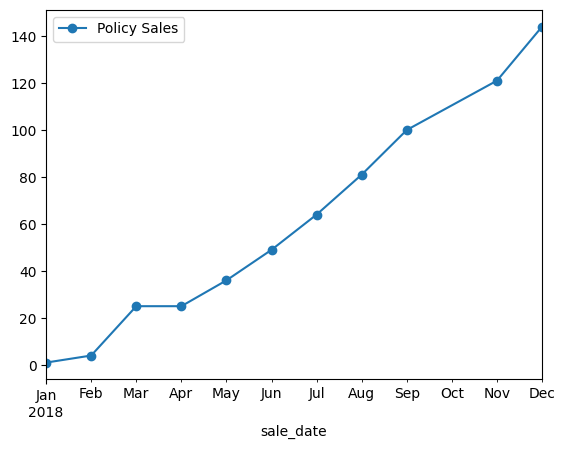

In [106]:
Final_df.head(11).plot(x='sale_date', y='Policy Sales', kind='line', marker='o')

<Axes: xlabel='sale_date'>

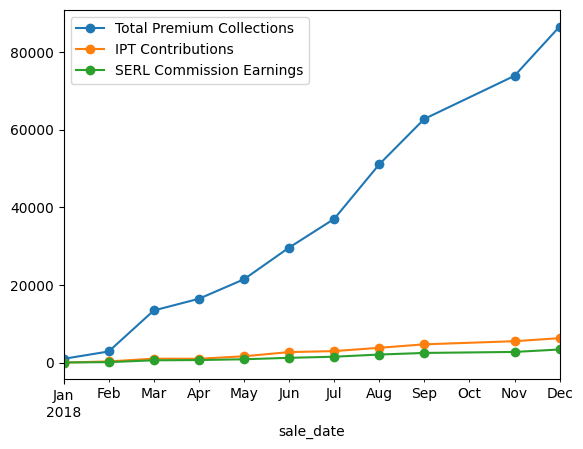

In [111]:
Final_df.head(11).plot(x='sale_date', y=(['Total Premium Collections', 'IPT Contributions',
       'SERL Commission Earnings']), kind='line', marker='o')

In [108]:
Final_df.columns

Index(['sale_date', 'Policy Sales', 'Cancellations', 'Sales Growth Rate',
       'Total Premium Collections', 'IPT Contributions',
       'SERL Commission Earnings', 'Best_product', 'best_producr_premium'],
      dtype='object')

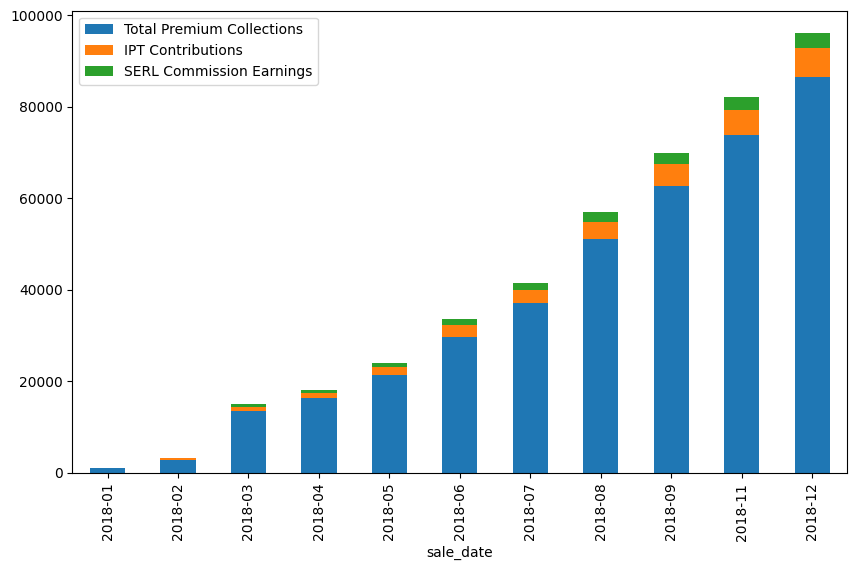

In [113]:
ax = Final_df.head(11).set_index('sale_date')[['Total Premium Collections', 'IPT Contributions', 'SERL Commission Earnings']].plot(kind='bar', stacked=True, figsize=(10, 6))
